In [41]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
import dotenv
from sqlalchemy import create_engine, text

dotenv.load_dotenv()

True

In [42]:
SAVE_LOCATION = os.getenv("EPIC_4_SAVE_LOCATION")

df = pd.read_csv(os.path.join(SAVE_LOCATION, "data.csv"))
df

,crm_contact_functietitel,crm_persoon_mail_thema_duurzaamheid,crm_persoon_mail_thema_financieel_fiscaal,crm_persoon_mail_thema_innovatie,crm_persoon_mail_thema_internationaal_ondernemen,crm_persoon_mail_thema_mobiliteit,crm_persoon_mail_thema_omgeving,crm_persoon_mail_thema_sales_marketing_communicatie,crm_persoon_mail_thema_strategie_en_algemeen_management,crm_Persoon_Mail_thema_talent,...,crm_activiteitscode_naam_Papier & karton,crm_activiteitscode_naam_Technologische industrie & diensten,crm_activiteitscode_naam_Telecom & IT,"crm_activiteitscode_naam_Textiel, kleding en confectie",crm_activiteitscode_naam_Vastgoed,crm_activiteitscode_naam_Verenigingen en maatschappelijke organisaties,crm_activiteitscode_naam_Verzekering,crm_activiteitscode_naam_Voeding,crm_activiteitscode_naam_Vrije beroepen,crm_activiteitscode_naam_Zorg
0,5498,1,1,1,1,1,1,1,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,14112,1,1,1,1,1,1,1,1,1,...,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,749,1,1,1,1,1,1,1,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,14438,1,1,1,1,1,1,1,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1274,1,1,1,1,1,1,1,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55481,5124,1,1,1,1,1,1,1,1,1,...,0.0,0.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0
55482,14438,1,1,1,1,1,1,1,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
55483,15172,1,1,1,1,1,1,1,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
55484,1178,1,1,1,1,1,1,1,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Which models do we use?
- K-means clustering
- DBSCAN
- Gaussian Mixtures

In [43]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer

In [44]:
# Count the amount of columns that aren't numeric
non_numeric_columns = 0
for column in df.columns:
    if df[column].dtype == object:
        non_numeric_columns += 1
print("Amount of non-numeric columns: " + str(non_numeric_columns))

Amount of non-numeric columns: 0


In [45]:
# Split the data into training and testing data
test_size = 0.2

df_train, df_test = train_test_split(df, test_size=test_size, random_state=42)

df_train.shape, df_test.shape

((44388, 128), (11098, 128))

In [46]:
# Impute the missing values with the median
imputer = sklearn.impute.SimpleImputer(strategy="median")
imputer.fit(df_train)
df_train = imputer.transform(df_train)
df_test = imputer.transform(df_test)

# Scale the data
scaler = MinMaxScaler()
scaler.fit(df_train)
df_train = scaler.transform(df_train)
df_test = scaler.transform(df_test)

# Save both imputer and scaler
import pickle

with open(os.path.join(SAVE_LOCATION, "imputer.pkl"), "wb") as f:
    pickle.dump(imputer, f)

with open(os.path.join(SAVE_LOCATION, "scaler.pkl"), "wb") as f:
    pickle.dump(scaler, f)

In [47]:
clusters_range = range(1, 500, 10)

# Calculate the inertia for each cluster
inertia = []
for k in clusters_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=5)
    kmeans.fit(df_train)
    inertia.append(kmeans.inertia_)
    print("k: " + str(k) + ", inertia: " + str(kmeans.inertia_))
inertia

k: 1, inertia: 61420.356921450235
k: 11, inertia: 30075.27499787626
k: 21, inertia: 26140.800773695024
k: 31, inertia: 24163.603314299296
k: 41, inertia: 22851.497307808273
k: 51, inertia: 21884.63747349949
k: 61, inertia: 20872.33463596289
k: 71, inertia: 20270.655362920832
k: 81, inertia: 19689.66597478739
k: 91, inertia: 19149.72367511595
k: 101, inertia: 18666.016261197597
k: 111, inertia: 18241.970722930553
k: 121, inertia: 17929.04924767322
k: 131, inertia: 17640.59818686884
k: 141, inertia: 17298.730524072478
k: 151, inertia: 16988.825048869145
k: 161, inertia: 16763.724323618415
k: 171, inertia: 16487.94789887215
k: 181, inertia: 16282.195710313517
k: 191, inertia: 16034.848258006354
k: 201, inertia: 15839.495116330258
k: 211, inertia: 15655.185652902186
k: 221, inertia: 15478.93158975857
k: 231, inertia: 15214.57561511553
k: 241, inertia: 15032.65123509704
k: 251, inertia: 14924.244527359211
k: 261, inertia: 14783.286695657342
k: 271, inertia: 14634.437302502476
k: 281, inerti

[61420.356921450235,
 30075.27499787626,
 26140.800773695024,
 24163.603314299296,
 22851.497307808273,
 21884.63747349949,
 20872.33463596289,
 20270.655362920832,
 19689.66597478739,
 19149.72367511595,
 18666.016261197597,
 18241.970722930553,
 17929.04924767322,
 17640.59818686884,
 17298.730524072478,
 16988.825048869145,
 16763.724323618415,
 16487.94789887215,
 16282.195710313517,
 16034.848258006354,
 15839.495116330258,
 15655.185652902186,
 15478.93158975857,
 15214.57561511553,
 15032.65123509704,
 14924.244527359211,
 14783.286695657342,
 14634.437302502476,
 14556.948413831993,
 14345.324515457523,
 14231.635305539749,
 14088.979704770856,
 13953.645916403593,
 13819.893532282736,
 13712.6308239008,
 13578.718896585124,
 13524.504835834994,
 13361.546489665328,
 13294.860550367264,
 13188.555645954168,
 13096.256662283631,
 12983.118616048461,
 12891.913314673222,
 12796.477458003936,
 12701.693134666835,
 12573.005319285054,
 12543.655692097494,
 12459.489529924653,
 1238

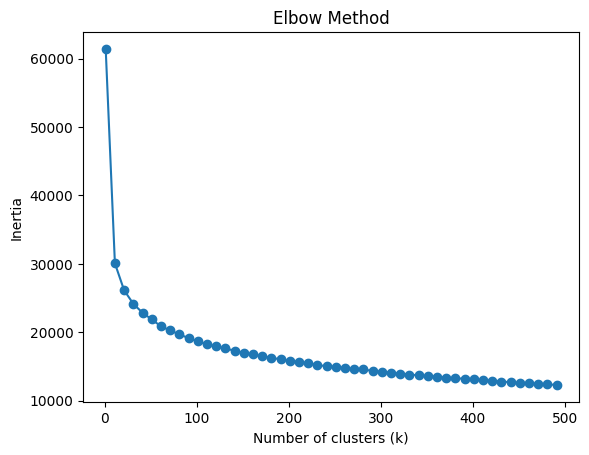

In [48]:
plt.plot(clusters_range, inertia, 'o-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

k: 25, inertia: 25188.560034938197
k: 27, inertia: 24779.584324228013
k: 29, inertia: 24451.8014586516
k: 31, inertia: 24163.603314299296
k: 33, inertia: 23887.883968233582
k: 35, inertia: 23618.035245698993
k: 37, inertia: 23441.03166270189
k: 39, inertia: 22986.660588466595
k: 41, inertia: 22851.497307808273
k: 43, inertia: 22491.54028783574
k: 45, inertia: 22478.84006840144
k: 47, inertia: 22277.825089542162
k: 49, inertia: 21997.22807062412
k: 51, inertia: 21884.63747349949
k: 53, inertia: 21599.668964305296
k: 55, inertia: 21620.723389980085
k: 57, inertia: 21261.155030043945
k: 59, inertia: 21098.691293850796
k: 61, inertia: 20872.334635962892
k: 63, inertia: 20813.82835925538
k: 65, inertia: 20706.001501666036
k: 67, inertia: 20470.44118371014
k: 69, inertia: 20364.07933531156
k: 71, inertia: 20270.655362920832
k: 73, inertia: 20189.706979499435
k: 75, inertia: 20002.827374981778
k: 77, inertia: 19830.60177931834
k: 79, inertia: 19664.329420424754
k: 81, inertia: 19689.665974787

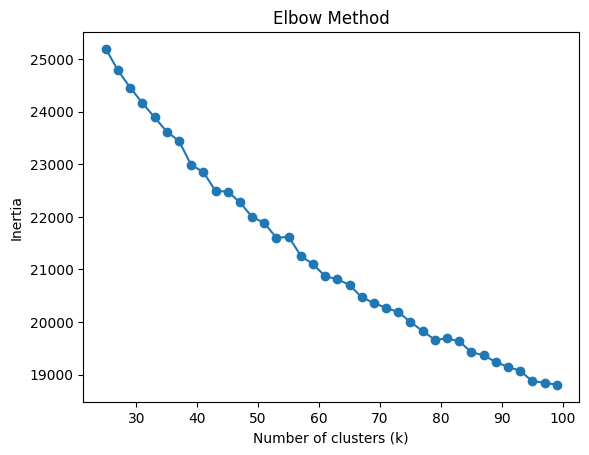

In [49]:
clusters_range = range(25, 100, 2)

# Calculate the inertia for each cluster
inertia = []
for k in clusters_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=5)
    kmeans.fit(df_train)
    inertia.append(kmeans.inertia_)
    print("k: " + str(k) + ", inertia: " + str(kmeans.inertia_))
plt.plot(clusters_range, inertia, 'o-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

c:\Users\Maarten Boon\Documents\school\jaar3\DEP II\code\Data-Engineering-Project-II\venv\Lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but KMeans was fitted without feature names
  warnings.warn(


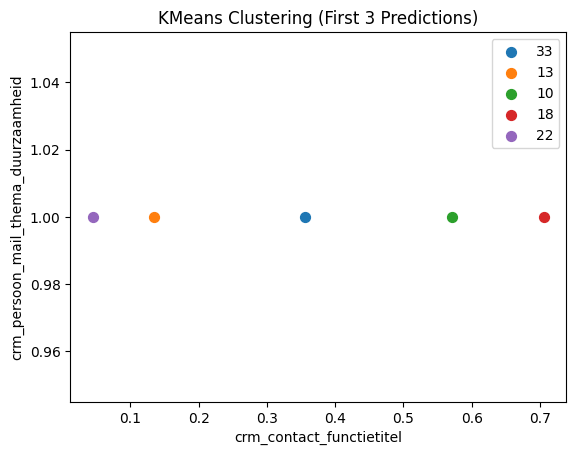

In [51]:
k = 55
kmeans = KMeans(n_clusters=k, random_state=42, n_init=5)

# Fit the model to the training data
kmeans.fit(df_train)

# Test the model on the test data
prediction = kmeans.predict(df_test)

# Show only 3 predictions at a time
df_test = pd.DataFrame(df_test, columns=df.columns)
df_test_result = df_test.copy()
df_test_result["cluster"] = prediction
fig, ax = plt.subplots()
for i in range(5):
    ax.scatter(df_test_result['crm_contact_functietitel'][i], df_test_result['crm_persoon_mail_thema_duurzaamheid'][i], label=df_test_result['cluster'][i], s=50)
ax.legend()
plt.xlabel('crm_contact_functietitel')
plt.ylabel('crm_persoon_mail_thema_duurzaamheid')
plt.title('KMeans Clustering (First 3 Predictions)')
plt.show()